In [1]:
import numpy as np
import pandas as pd

import corner
import matplotlib.pyplot as plt


import matplotlib 
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

font = {'family' : 'courier',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

In [2]:
# Datasets we analysed, and some tinkering with plotting ranges
datasets = [
            (452922110, "normal_uncertainty", None, None,
            "07_12_2020_15_44", ""),
            (452922110,"high_uncertainties_peak1", None, None,
            "10_12_2020_07_05", ""),
            (44984200, "normal_uncertainty", 1587.8,1588.7, 
            "07_12_2020_18_46", ""),
            (44984200, "high_uncertainties_peak1", 1587.8,1588.7,
            "10_12_2020_07_12", "c"), 
            (277539431, "normal_uncertainty", None, None, 
             "07_12_2020_15_26", ""),
    
    #two-flare
    
            (237880881,"normal_uncertainties",
             1331.6,1332.6, 
            "07_12_2020_07_47","a"),
            (237880881,"high_uncertainties_peaks12",
             1331.6,1332.6,
             "10_12_2020_07_11","a"),
            (44984200, "normal_uncertainties",  
            1587.8,1588.7, 
            "07_12_2020_19_42","a"),
            (44984200,"high_uncertainties_peaks12",
               1587.8,1588.8,
              "10_12_2020_07_10","a"),
    
 
            ]

In [3]:
res_phases = {}
rot = pd.read_csv("../../data/summary/inclination_input.csv")


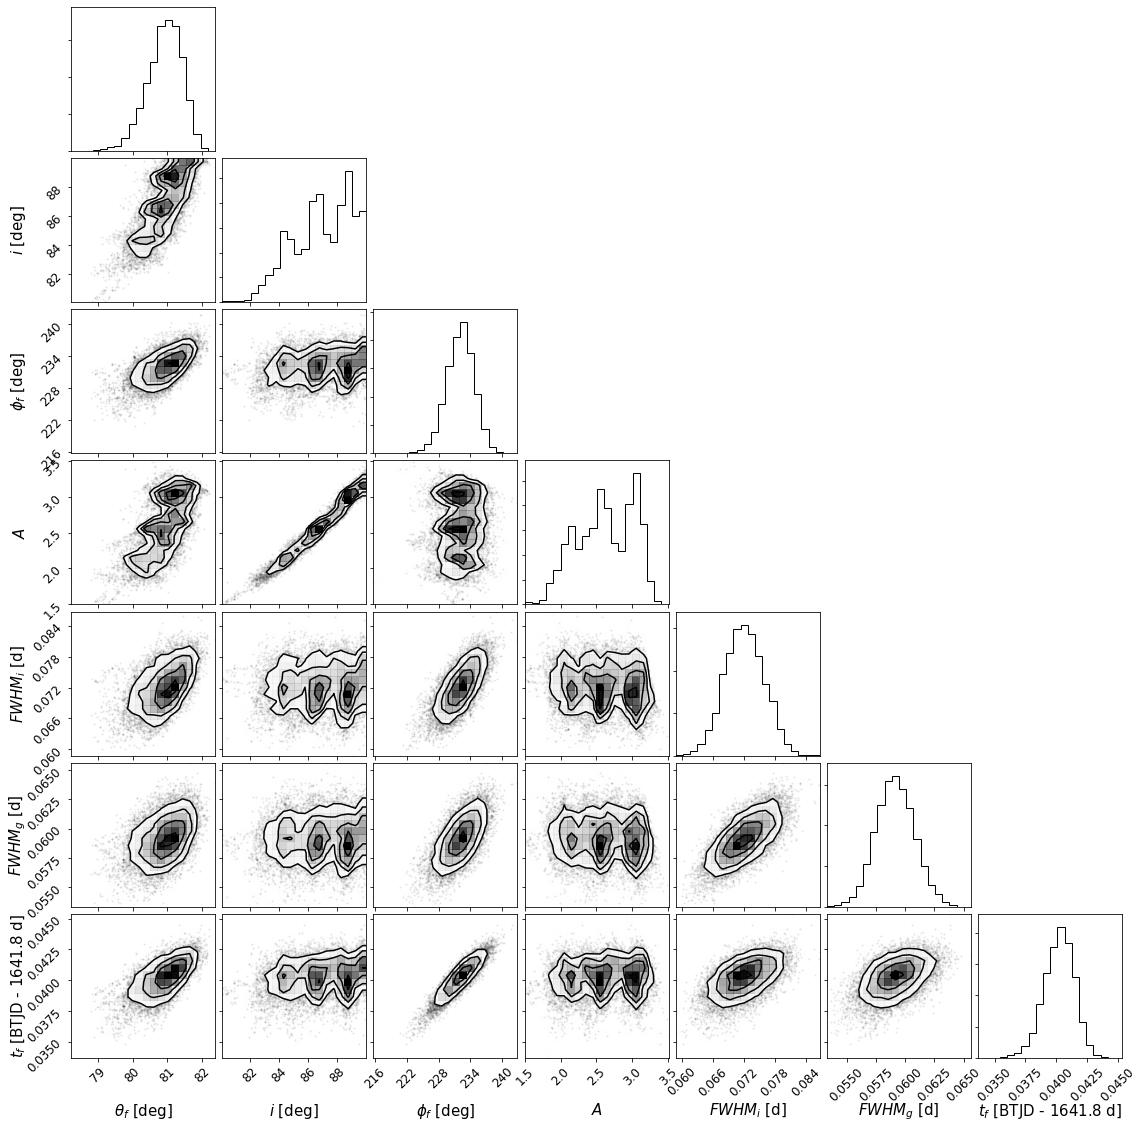

In [8]:
for ID, note, x, y, tstamp, suffix in datasets[4:5]:

    df = pd.read_csv(f"../results/mcmc/{tstamp}_{ID}{suffix}_converted_mcmc_sample.csv")
    

    df = df[[ 'latitude_deg', 'i_deg', 'phase_deg', 'a', 'fwhm1_d', 'fwhm2_d','t0_d' ]]
    offs = np.round(df.t0_d.iloc[-1],1)
    df.t0_d = df.t0_d - offs
    df = df.rename(index=str, columns={'t0_d':r'$t_f$ ' + f'[BTJD - {offs} d]',
                                       'latitude_deg':r'$\theta_f$ [deg]', 
                                       'fwhm1_d' : '$FWHM_{i}$ [d]',
                                       'fwhm2_d' : '$FWHM_{g}$ [d]', 
                                       'i_deg' : '$i$ [deg]', 
                                       'phase_deg' : r'$\phi_f$ [deg]',
                                       'a' : r'$A$'})
    corner.corner(df.iloc[18000:])

#    res_phases[str(ID) + suffix + "_" + tstamp] =  (phi0.quantile([.16,0.5,.84])*180/np.pi)
    plt.savefig(f"../plots/flarefit/review/{ID}_{suffix}_{tstamp}_corner.png")

In [112]:
df.shape

(28800, 7)

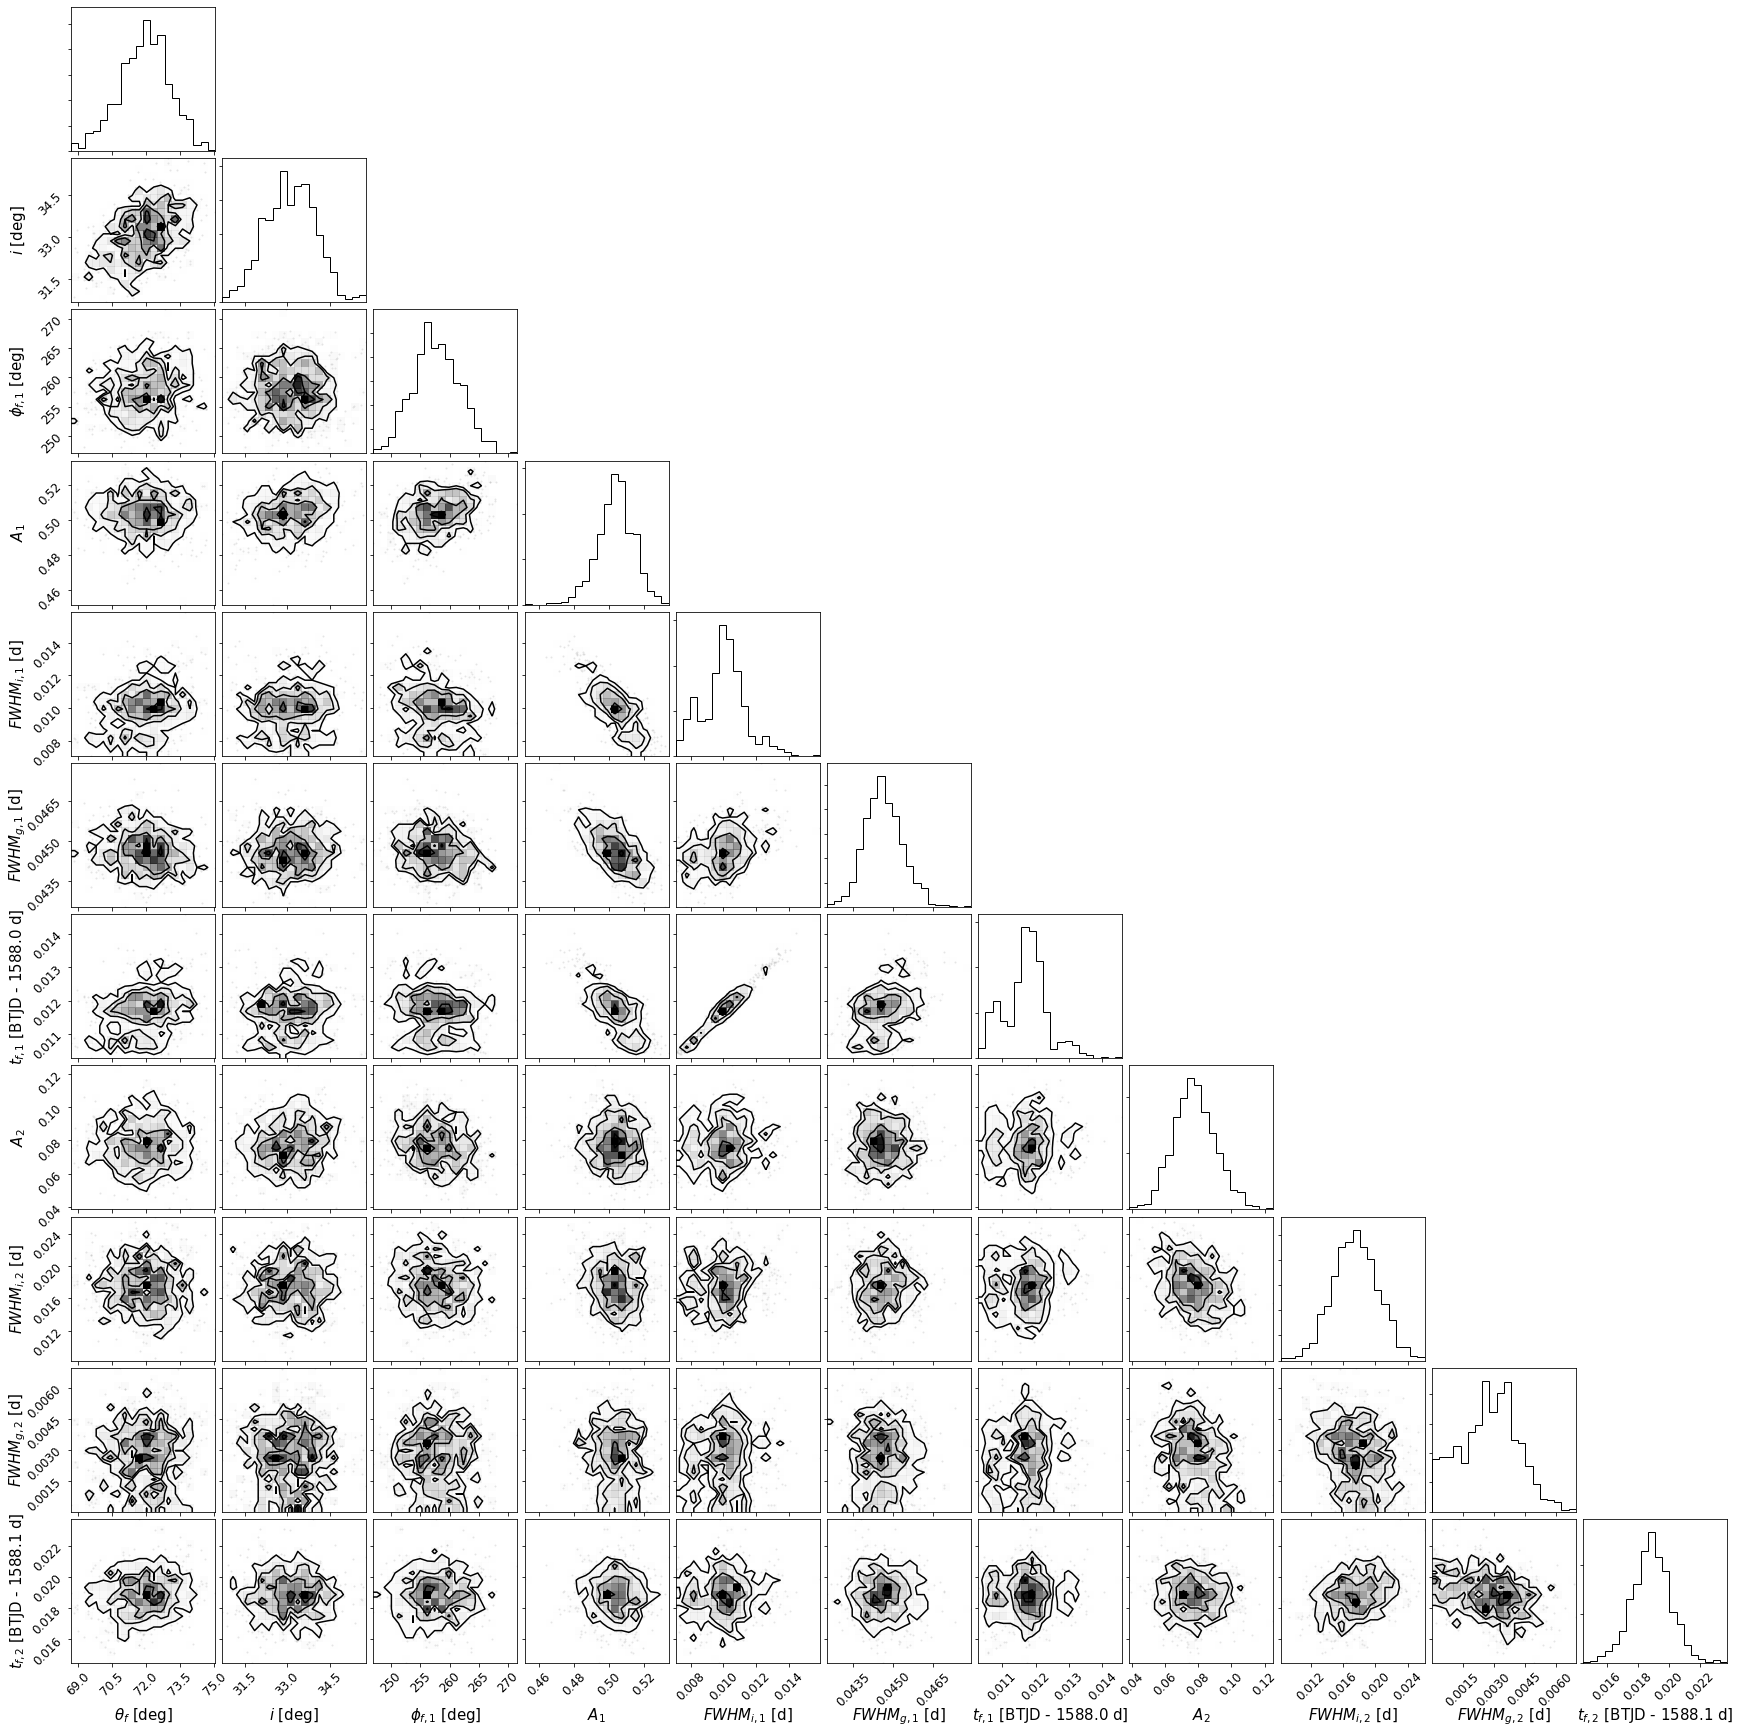

In [6]:
for ID, note, x, y, tstamp, suffix in datasets[8:9]:

    df1 = pd.read_csv(f"../results/mcmc/{tstamp}_{ID}a_converted_mcmc_sample.csv")
    df1 = df1[[ 'latitude_deg', 'i_deg', 'phase_deg',  'a', 'fwhm1_d', 'fwhm2_d', 't0_d',]]
    df2 = pd.read_csv(f"../results/mcmc/{tstamp}_{ID}b_converted_mcmc_sample.csv")
    df2 = df2[['a', 'fwhm1_d', 'fwhm2_d','t0_d']]
    
    offs_ = []
    for d_ in [df1, df2]:
        offs = np.round(d_.t0_d.iloc[-1],1)
        d_.t0_d = d_.t0_d - offs
        offs_.append(offs)
    
    df1 = df1.rename(index=str, columns={'t0_d':r'$t_{f,1}$ ' + f'[BTJD - {offs_[0]} d]',
                                       'latitude_deg':r'$\theta_f$ [deg]', 
                                       'fwhm1_d' : '$FWHM_{i,1}$ [d]',
                                       'fwhm2_d' : '$FWHM_{g,1}$ [d]', 
                                       'i_deg' : '$i$ [deg]', 
                                       'phase_deg' : r'$\phi_{f,1}$ [deg]',
                                        'a': '$A_1$'})
    df2 = df2.rename(index=str, columns={'t0_d':r'$t_{f,2}$ ' + f'[BTJD - {offs_[1]} d]',
                                       'fwhm1_d' : '$FWHM_{i,2}$ [d]',
                                       'fwhm2_d' : '$FWHM_{g,2}$ [d]', 
                                        'a': '$A_2$'})
    df = pd.concat([df1,df2], axis=1).iloc[28000:]

    corner.corner(df)
    plt.savefig(f"../plots/flarefit/{ID}_{tstamp}_corner.png")

In [105]:
p16, p50, p84 = 229.354173047544, 232.09399839664, 234.611761093669
p = np.array([p16, p50, p84]) / 360
p[1],  p[1]-p[0], p[2]-p[1]

(0.6447055511017777, 0.007610625969711071, 0.006993785269525099)

In [106]:
from funcs.model import daylength

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [109]:
0.75 - (daylength(80.9/180*np.pi, 87/180*np.pi) - 0.5) / 2

0.6969486888341292

In [13]:
lc.t[0] + phi_a.mean()

1649.480228871804